# 3 Quantum circuit of the Shor's Code  [Wikipedia](https://en.wikipedia.org/wiki/Quantum_error_correction)
A pratical algorithm combining bit flip and phase flip.

The [original paper](https://www.cs.miami.edu/home/burt/learning/Csc670.052/pR2493_1.pdf) use Bell basis to explicitly show how to detect and correct the error.

While the [text book](https://profmcruz.wordpress.com/wp-content/uploads/2017/08/quantum-computation-and-quantum-information-nielsen-chuang.pdf) of Nielsen and Chuang introduce the stabilizer formalism from here.

In [ ]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f7972c7ffb4d9ebdb2541449b7bff7cedd29ead33e729f62cb2049c569d4ca0c
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

backend = AerSimulator()

# Design the quantum circuit

By default, all qubits are $\lvert 0 \rangle$, we use Hadamard gate to change $q_{0}$ from $\lvert 0 \rangle$ to $\lvert + \rangle$.

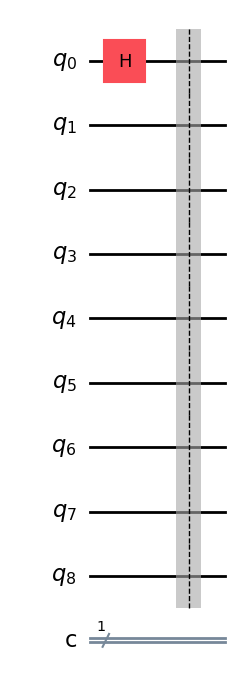

In [ ]:
qc = QuantumCircuit(9, 1)
qc.h(0)
qc.barrier()
qc.draw('mpl')

Use CNOT gates to entangle $q_{0}$ with $q_{3}$ and $q_{6}$ to protect bit flip error.

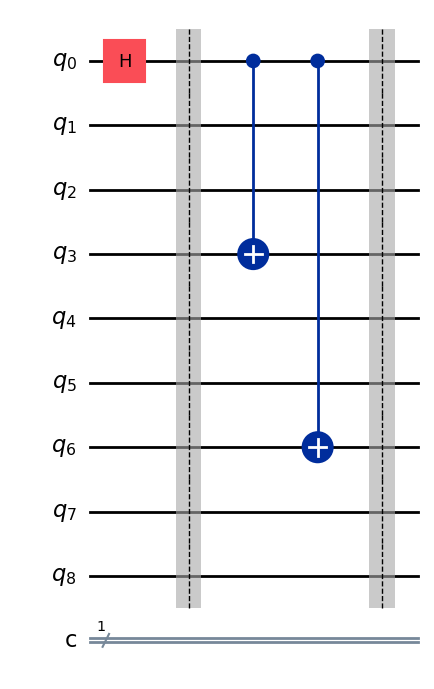

In [ ]:
qc.cx(0, 3)
qc.cx(0, 6)
qc.barrier()
qc.draw('mpl')

Map to the Hadamard basis and entangle two qubits to each qubits to protect phase flip error.

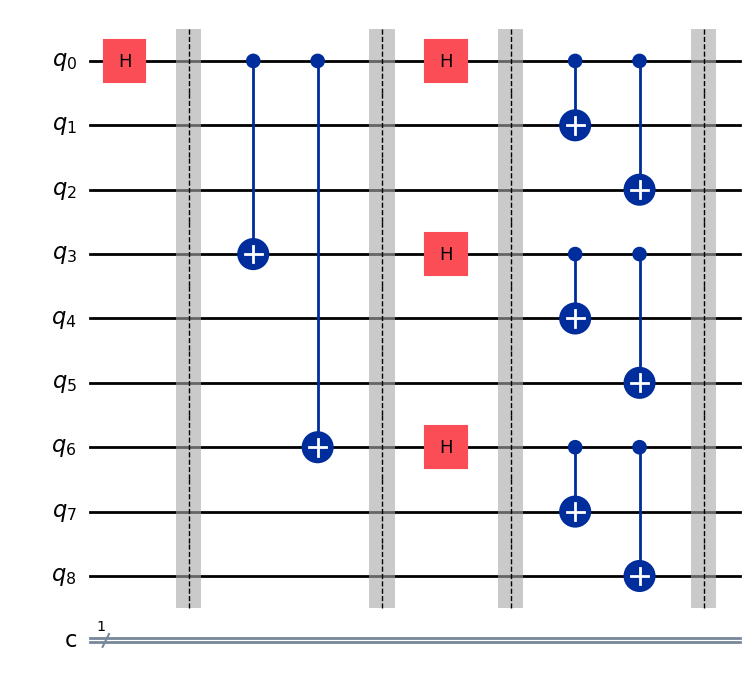

In [ ]:
qc.h([0, 3, 6])
qc.barrier()
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(3, 4)
qc.cx(3, 5)
qc.cx(6, 7)
qc.cx(6, 8)
qc.barrier()
qc.draw('mpl')

Introduce an arbitrary error, which could happen on any qubit, let's take XZ on $q_{0}$ for example.

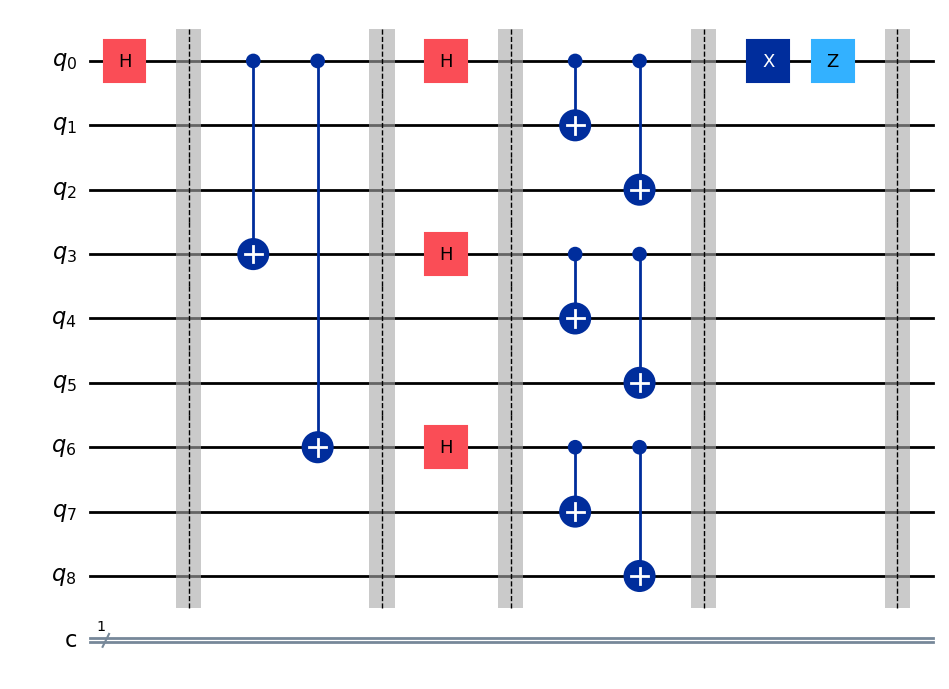

In [ ]:
qc.x(0)
qc.z(0)
qc.barrier()
qc.draw('mpl')

Apply majority-vote correction for phase flip and map back to original computational basis.

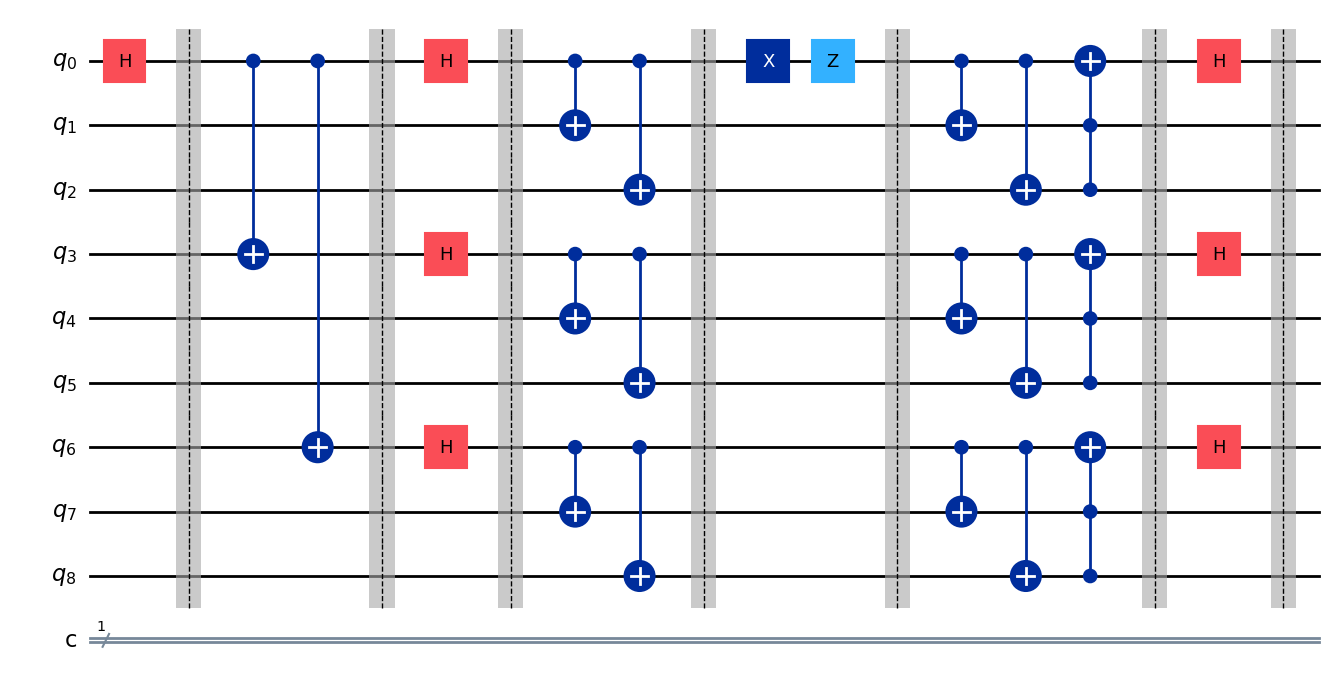

In [ ]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)
qc.cx(3, 4)
qc.cx(3, 5)
qc.ccx(4, 5, 3)
qc.cx(6, 7)
qc.cx(6, 8)
qc.ccx(7, 8, 6)
qc.barrier()
qc.h([0, 3, 6])
qc.barrier()
qc.draw('mpl')

Apply majority-vote correction for bit flip.

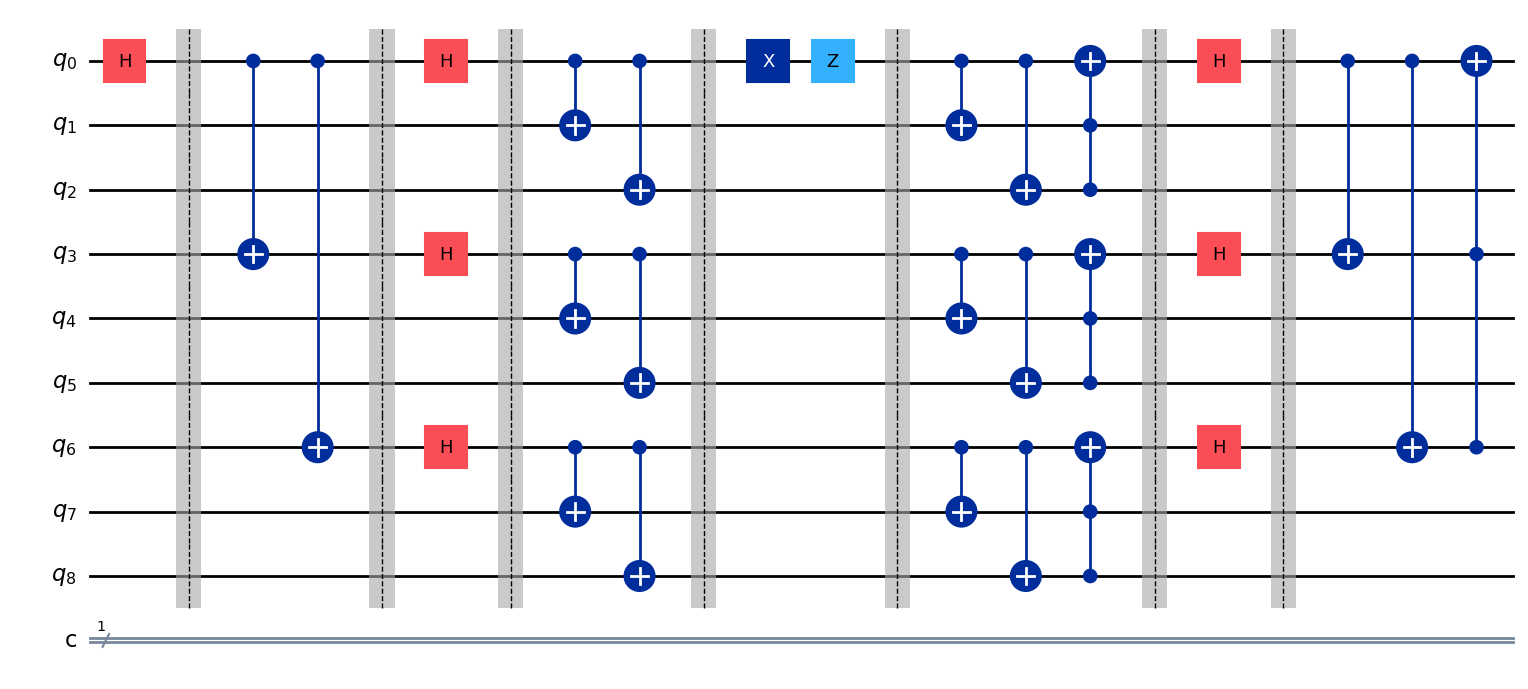

In [ ]:
qc.cx(0, 3)
qc.cx(0, 6)
qc.ccx(3, 6, 0)
qc.draw('mpl')

Measure the qubit $q_{0}$ and write into the classical bit $c$.

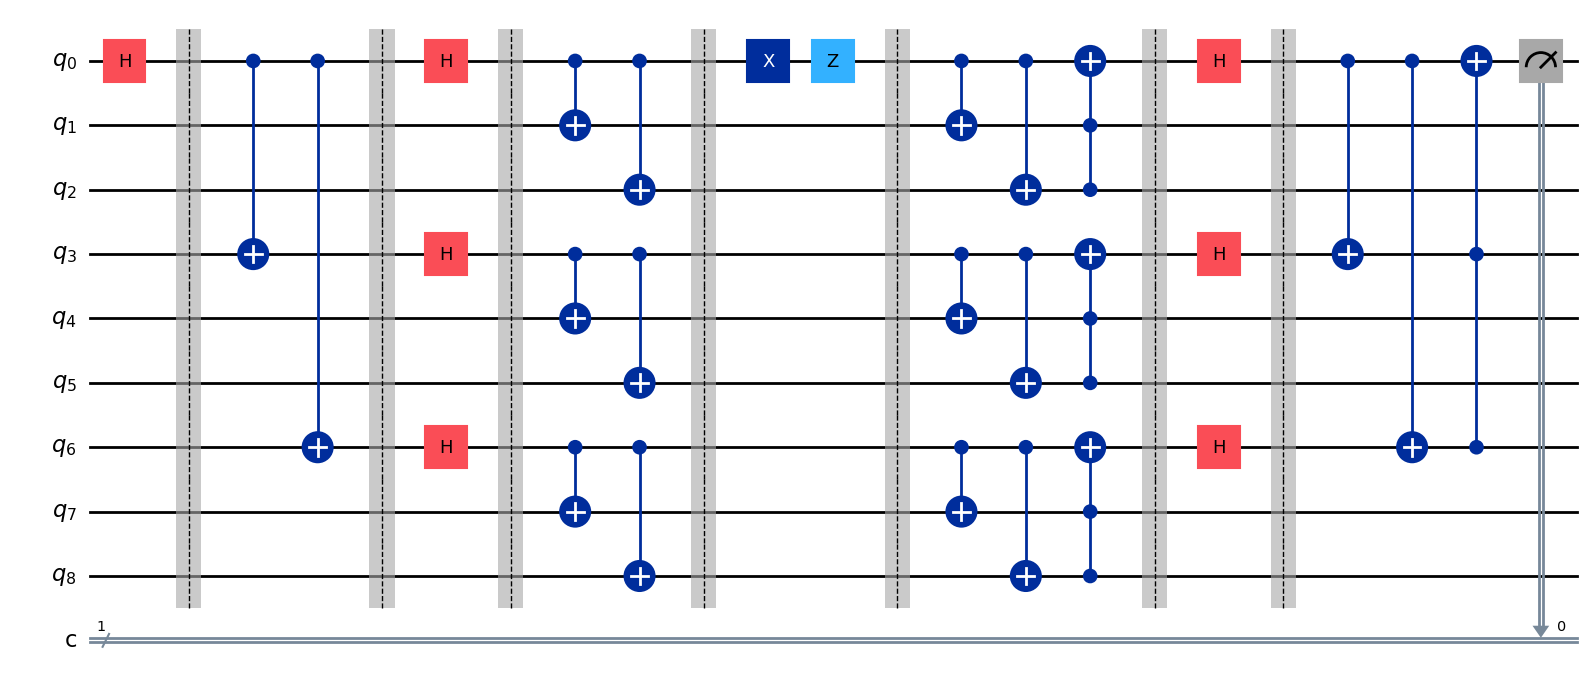

In [ ]:
qc.measure(0, 0)
qc.draw('mpl')

# Simulate the quantum circuit
The result shows the distribution of 10000 total counts, which meets expectation.

In [ ]:
job    = backend.run(qc, shots=10000)
counts = job.result().get_counts()
print('Result:', counts)

Result: {'0': 4995, '1': 5005}
